In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as pp
%matplotlib inline

In [21]:
train = pd.read_csv("../organized_data/train_organized.csv")
train

,individualnumber,category_number,hakkedis_amt,odul_amt,response,total_money_spent,total_discount,sanal_percent,shop_count,months_since_last_shopping,...,level3_relevant_category_volume_per_day,level4_relevant_category_volume_per_day,level1_relevant_category_quantity_per_day,level2_relevant_category_quantity_per_day,level3_relevant_category_quantity_per_day,level4_relevant_category_quantity_per_day,total_money_spent_per_day,discount_per_day,odul/hakkedis,is_large_city
0,94230288,9000,21.0,2.0,0,7118.94741,177.489978,0.015625,64.0,1.0,...,0.675378,0.675378,0.270924,0.131653,0.100840,0.100840,19.941029,0.497171,0.095238,True
1,4684087,9000,17.0,1.0,0,10192.64563,31907.260487,0.000000,30.0,1.0,...,0.342718,0.342718,0.113528,0.038835,0.038835,0.038835,32.985908,103.259743,0.058824,False
2,92472145,9058,24.0,3.0,0,35113.80415,10060.118391,0.013514,518.0,1.0,...,1.806940,0.330191,3.309934,0.396175,0.368852,0.030055,95.939356,27.486662,0.125000,True
3,88026681,9030,22.0,2.0,0,11559.66676,231.976316,0.950000,40.0,1.0,...,0.396143,0.396143,0.040000,0.022857,0.022857,0.022857,33.027619,0.662789,0.090909,True
4,98127795,9001,38.0,3.0,0,461.77380,1.738800,0.000000,4.0,3.0,...,0.202128,0.202128,0.058511,0.010638,0.010638,0.010638,2.456244,0.009249,0.078947,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,16893.83688,1598.015176,0.009881,506.0,1.0,...,0.232356,0.161534,0.060274,0.019178,0.019178,0.013699,46.284485,4.378124,0.074074,True
13111,96841665,9004,65.0,6.0,0,13089.84113,500.344604,0.000000,40.0,1.0,...,0.748507,0.748507,0.065672,0.014925,0.014925,0.014925,39.074153,1.493566,0.092308,True
13112,98445787,9044,33.0,3.0,0,2432.60788,244.758629,0.000000,39.0,1.0,...,0.077468,0.077468,0.030342,0.010734,0.002331,0.002331,6.814028,0.685598,0.090909,False
13113,13781030,9004,66.0,6.0,0,1242.70635,6.080452,0.090909,11.0,1.0,...,0.202663,0.202663,0.002959,0.002959,0.002959,0.002959,3.676646,0.017990,0.090909,False


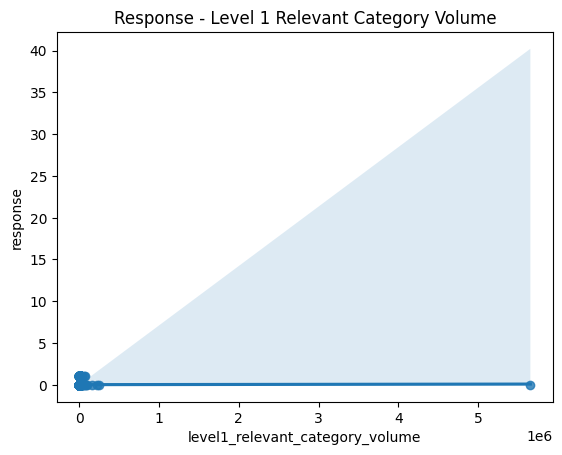

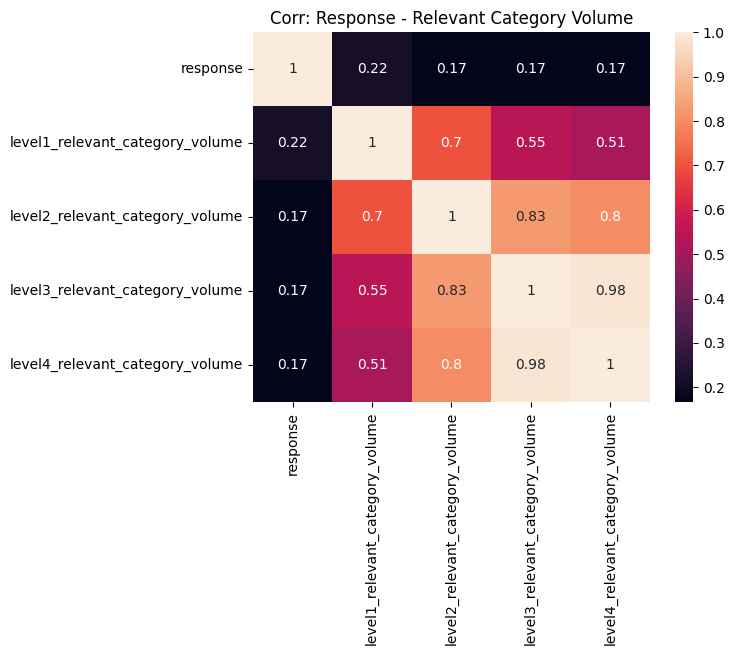

In [22]:
# Visualize response by level1_relevant_category_volume to see outliers before visualizing correlation.

data = train[["response", "level1_relevant_category_volume", "level2_relevant_category_volume", "level3_relevant_category_volume", "level4_relevant_category_volume"]]

x = data.level1_relevant_category_volume.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="level1_relevant_category_volume", y="response")
plt.title("Response - Level 1 Relevant Category Volume")
plt.show()

upper_limit_1 = data["level1_relevant_category_volume"].quantile(0.999)
upper_limit_2 = data["level2_relevant_category_volume"].quantile(0.999)
upper_limit_3 = data["level3_relevant_category_volume"].quantile(0.999)
upper_limit_4 = data["level4_relevant_category_volume"].quantile(0.999)

mark_1 = ((data["level1_relevant_category_volume"] <= upper_limit_1) & (data["level2_relevant_category_volume"] <= upper_limit_2) & (data["level3_relevant_category_volume"] <= upper_limit_3) & (data["level4_relevant_category_volume"] <= upper_limit_4))
data_marked = data[mark_1]

correlation = data_marked.corr()
correlation["response"]

sns.heatmap(correlation, annot=True)
plt.title("Corr: Response - Relevant Category Volume")
plt.show()

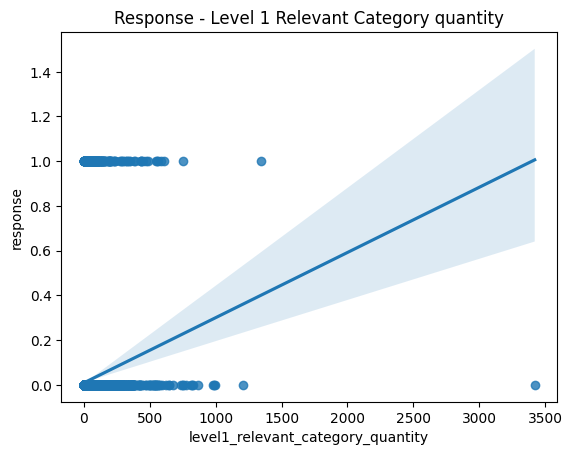

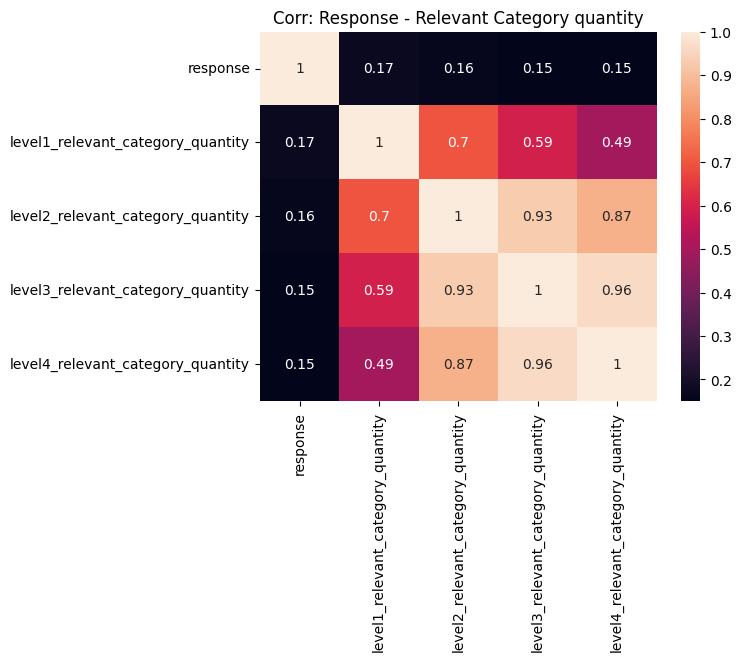

In [23]:
# Visualize response by level1_relevant_category_quantity to see outliers before visualizing correlation.

data = train[["response", "level1_relevant_category_quantity", "level2_relevant_category_quantity", "level3_relevant_category_quantity", "level4_relevant_category_quantity"]]

x = data.level1_relevant_category_quantity.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="level1_relevant_category_quantity", y="response")
plt.title("Response - Level 1 Relevant Category quantity")
plt.show()

upper_limit_1 = data["level1_relevant_category_quantity"].quantile(0.999)
upper_limit_2 = data["level2_relevant_category_quantity"].quantile(0.999)
upper_limit_3 = data["level3_relevant_category_quantity"].quantile(0.999)
upper_limit_4 = data["level4_relevant_category_quantity"].quantile(0.999)

mark_2 = ((data["level1_relevant_category_quantity"] <= upper_limit_1) & (data["level2_relevant_category_quantity"] <= upper_limit_2) & (data["level3_relevant_category_quantity"] <= upper_limit_3) & (data["level4_relevant_category_quantity"] <= upper_limit_4))
data_marked = data[mark_1]

correlation = data_marked.corr()
correlation["response"]

sns.heatmap(correlation, annot=True)
plt.title("Corr: Response - Relevant Category quantity")
plt.show()

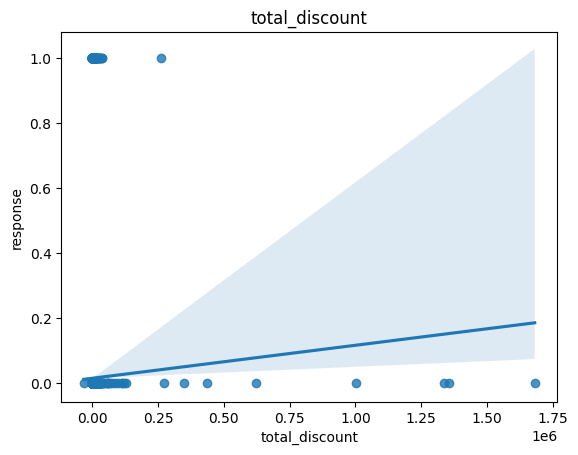

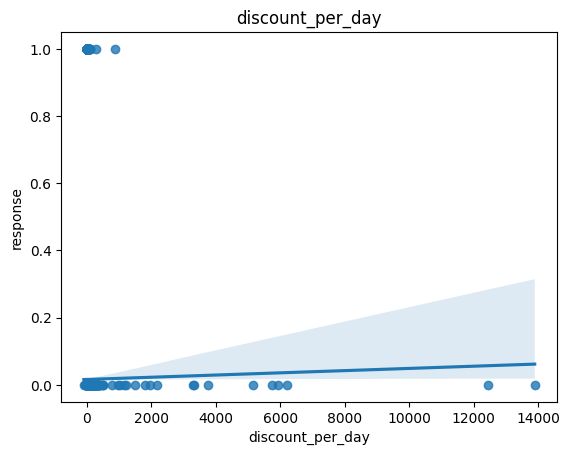

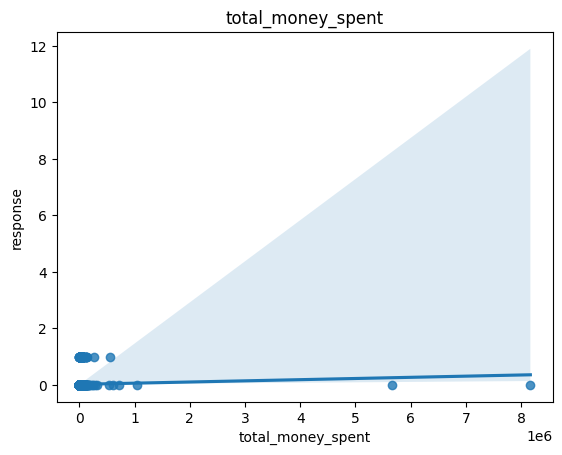

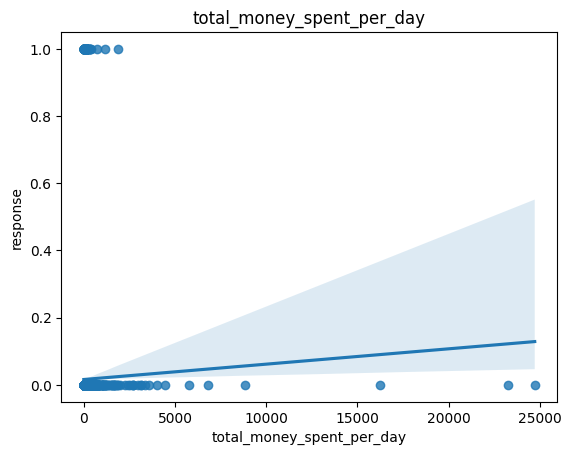

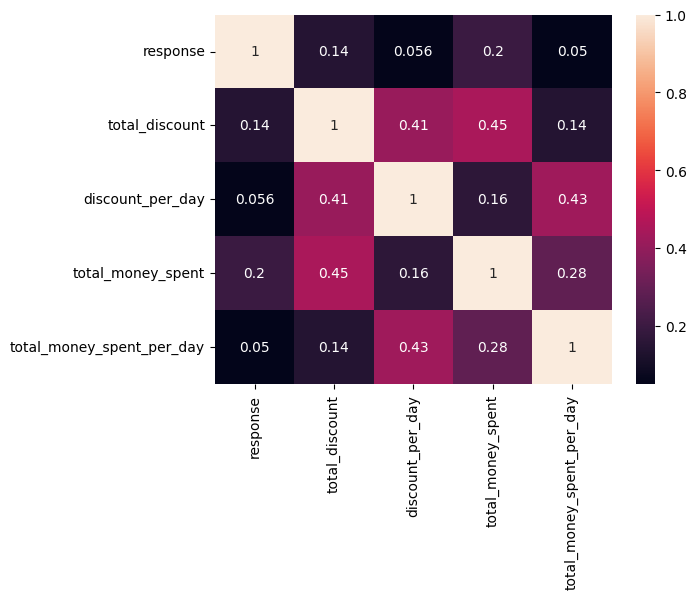

In [24]:
data = train[["response", "total_discount", "discount_per_day", "total_money_spent", "total_money_spent_per_day"]]

sns.regplot(data=data, x="total_discount", y="response")
plt.title("total_discount")
plt.show()

sns.regplot(data=data, x="discount_per_day", y="response")
plt.title("discount_per_day")
plt.show()

sns.regplot(data=data, x="total_money_spent", y="response")
plt.title("total_money_spent")
plt.show()

sns.regplot(data=data, x="total_money_spent_per_day", y="response")
plt.title("total_money_spent_per_day")
plt.show()

upper_limit_1 = data["discount_per_day"].quantile(0.999)
upper_limit_2 = data["total_money_spent_per_day"].quantile(0.999)

mark_3 = (data["total_discount"] < 0.25e6) & (data["discount_per_day"] < upper_limit_1) & (data["total_money_spent"] < 1e6) & (data["total_money_spent_per_day"] < upper_limit_2)
data_marked = data[mark_3]

correlation = data_marked.corr()
sns.heatmap(correlation, annot=True)
plt.show()

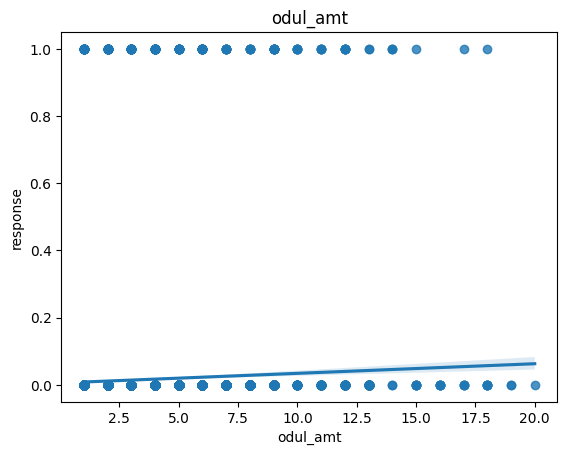

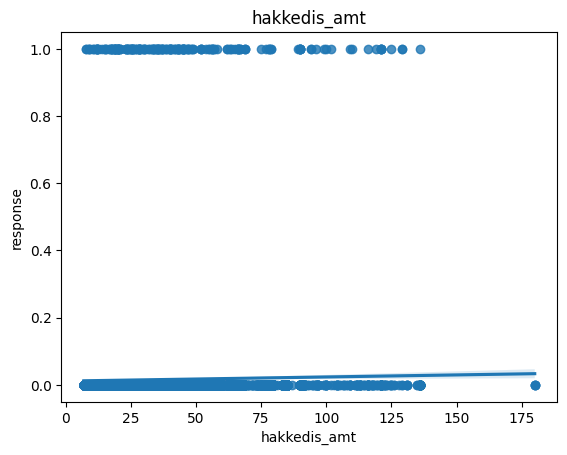

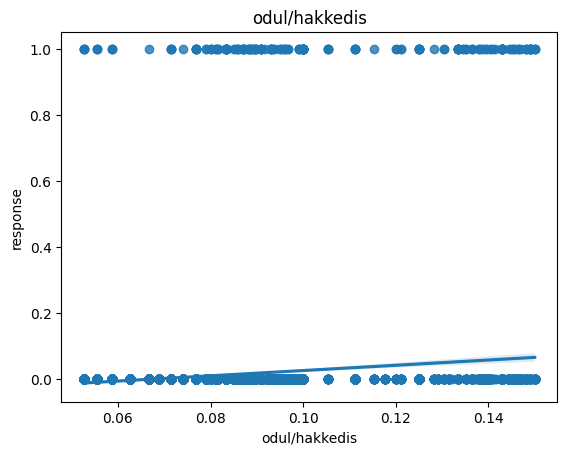

In [25]:
data = train[["response", "odul_amt", "hakkedis_amt", "odul/hakkedis"]]

sns.regplot(data=data, x="odul_amt", y="response")
plt.title("odul_amt")
plt.show()

sns.regplot(data=data, x="hakkedis_amt", y="response")
plt.title("hakkedis_amt")
plt.show()

sns.regplot(data=data, x="odul/hakkedis", y="response")
plt.title("odul/hakkedis")
plt.show()

In [26]:
mark = mark_1 & mark_2 & mark_3
train_cleaned = train[mark]

train_cleaned

,individualnumber,category_number,hakkedis_amt,odul_amt,response,total_money_spent,total_discount,sanal_percent,shop_count,months_since_last_shopping,...,level3_relevant_category_volume_per_day,level4_relevant_category_volume_per_day,level1_relevant_category_quantity_per_day,level2_relevant_category_quantity_per_day,level3_relevant_category_quantity_per_day,level4_relevant_category_quantity_per_day,total_money_spent_per_day,discount_per_day,odul/hakkedis,is_large_city
0,94230288,9000,21.0,2.0,0,7118.94741,177.489978,0.015625,64.0,1.0,...,0.675378,0.675378,0.270924,0.131653,0.100840,0.100840,19.941029,0.497171,0.095238,True
1,4684087,9000,17.0,1.0,0,10192.64563,31907.260487,0.000000,30.0,1.0,...,0.342718,0.342718,0.113528,0.038835,0.038835,0.038835,32.985908,103.259743,0.058824,False
3,88026681,9030,22.0,2.0,0,11559.66676,231.976316,0.950000,40.0,1.0,...,0.396143,0.396143,0.040000,0.022857,0.022857,0.022857,33.027619,0.662789,0.090909,True
4,98127795,9001,38.0,3.0,0,461.77380,1.738800,0.000000,4.0,3.0,...,0.202128,0.202128,0.058511,0.010638,0.010638,0.010638,2.456244,0.009249,0.078947,False
5,101834804,9046,85.0,8.0,0,180.57000,19.349210,0.000000,6.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.920957,0.205843,0.094118,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,16893.83688,1598.015176,0.009881,506.0,1.0,...,0.232356,0.161534,0.060274,0.019178,0.019178,0.013699,46.284485,4.378124,0.074074,True
13111,96841665,9004,65.0,6.0,0,13089.84113,500.344604,0.000000,40.0,1.0,...,0.748507,0.748507,0.065672,0.014925,0.014925,0.014925,39.074153,1.493566,0.092308,True
13112,98445787,9044,33.0,3.0,0,2432.60788,244.758629,0.000000,39.0,1.0,...,0.077468,0.077468,0.030342,0.010734,0.002331,0.002331,6.814028,0.685598,0.090909,False
13113,13781030,9004,66.0,6.0,0,1242.70635,6.080452,0.090909,11.0,1.0,...,0.202663,0.202663,0.002959,0.002959,0.002959,0.002959,3.676646,0.017990,0.090909,False


In [27]:
path = "../cleaned_data/"
train_cleaned.to_csv(f"{path}/train_cleaned_v1.csv", index=False)